<a href="https://colab.research.google.com/github/beercafeguy/PyMLLab/blob/master/DL_Day1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [ ]:
iris = load_iris()

In [ ]:
X = iris.data[:,(2,3)] # petal length and petal width
y = (iris.target == 0).astype(np.int_)

In [ ]:
X

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [ ]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
per_clf = Perceptron()
per_clf.fit(X,y)

y_pred = per_clf.predict([[2,0.5]])

In [ ]:
print(y_pred)

[0]


# Writing MLP using Keras

In [4]:
import tensorflow as tf
from tensorflow import keras


print(tf.__version__)

2.15.0


In [5]:
fashion_mnist = keras.datasets.fashion_mnist

(X_train_full, y_train_full),(X_test,y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [6]:
X_train_full.shape

(60000, 28, 28)

In [8]:
X_train_full.dtype

dtype('uint8')

In [9]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0 # dividing by 255.0 to scale the image values to 0-1
y_valid, y_train = y_train_full[:5000],y_train_full[5000:]

In [11]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [12]:
class_names[y_train[0]]

'Coat'

In [13]:
# create model using sequential API

model = keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
model.layers

In [16]:
first_hidden = model.layers[1]
first_hidden

In [17]:
weights, biases = first_hidden.get_weights()

In [18]:
weights

array([[-0.03583511,  0.01021608,  0.02903222, ..., -0.01310962,
        -0.01397278, -0.01848173],
       [ 0.04742059, -0.00731846,  0.04674588, ..., -0.04679684,
         0.04935309,  0.00056681],
       [ 0.06982201, -0.06924175,  0.02942982, ..., -0.02705819,
        -0.02260583,  0.00902144],
       ...,
       [ 0.03367139, -0.06844819, -0.02064287, ...,  0.06375845,
         0.01976433,  0.01937309],
       [-0.03548587, -0.0597407 , -0.06619478, ...,  0.03368688,
         0.06164584,  0.03517106],
       [-0.05693193, -0.02355298,  0.0599826 , ...,  0.0288595 ,
        -0.03280208,  0.01550941]], dtype=float32)

In [19]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [20]:
weights.shape

(784, 300)

In [21]:
biases.shape

(300,)

In [22]:
model.compile(
    loss = "sparse_categorical_crossentropy",
    optimizer="sgd", # optimizer=keras.optimiz ers.SGD(lr=<learning rate value>) default learning rate = 0.01
    metrics = ['accuracy']
)

In [23]:
history = model.fit(X_train,y_train, epochs = 30, validation_data = (X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.7284 - accuracy: 0.7603 - val_loss: 0.5488 - val_accuracy: 0.8154
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4886 - accuracy: 0.8301 - val_loss: 0.4355 - val_accuracy: 0.8534
Epoch 3/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4420 - accuracy: 0.8448 - val_loss: 0.4123 - val_accuracy: 0.8586
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4146 - accuracy: 0.8540 - val_loss: 0.4055 - val_accuracy: 0.8616
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3941 - accuracy: 0.8608 - val_loss: 0.3801 - val_accuracy: 0.8708
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3781 - accuracy: 0.8656 - val_loss: 0.3821 - val_accuracy: 0.8636
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3638 - accuracy: 0.8701 - val_loss: 0.3667 - val_accuracy:

In [24]:
import pandas as pd
import matplotlib.pyplot as plt


history_pd = pd.DataFrame(history.history)
history_pd

,loss,accuracy,val_loss,val_accuracy
0,0.728432,0.760309,0.548768,0.8154
1,0.488562,0.830109,0.435535,0.8534
2,0.441989,0.844782,0.412307,0.8586
3,0.414586,0.854000,0.405490,0.8616
4,0.394109,0.860800,0.380066,0.8708
5,0.378053,0.865618,0.382122,0.8636
6,0.363762,0.870073,0.366743,0.8710
7,0.351696,0.873709,0.355896,0.8744
8,0.340498,0.878182,0.342456,0.8798
9,0.331658,0.880327,0.347625,0.8748


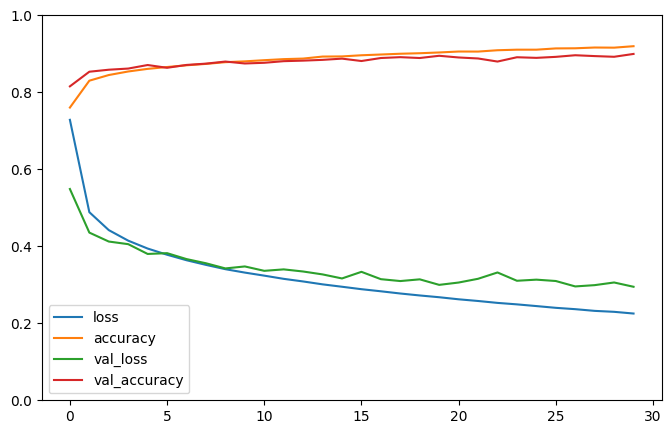

In [26]:
history_pd.plot(kind='line', figsize=(8, 5))
plt.grid=True
plt.gca().set_ylim(0,1)
plt.show()

In [27]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 64.5926 - accuracy: 0.8446


[64.59262084960938, 0.8446000218391418]

In [28]:
X_new = X_test[:3]

X_new

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [30]:
y_prob = model.predict(X_new)

y_prob.round(5)

1/1 [==============================] - 0s 37ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [33]:
import numpy as np
y_pred_classes =np.argmax(y_prob,axis=1)
y_pred_classes

array([9, 2, 1])

In [35]:
np.array(class_names)[y_pred_classes]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [36]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

In [ ]:
# so the classification was correct